In [205]:
import scipy.io as io
data1 = io.loadmat('ex3data1.mat')

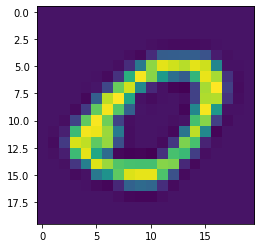

In [206]:
import matplotlib.pyplot as plt
plt.figure('test')
plt.imshow(data1['X'][0].reshape(20,20))
plt.show()

In [207]:
print(data1['__header__'])

b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011'


In [208]:
X = data1['X']
y = data1['y']

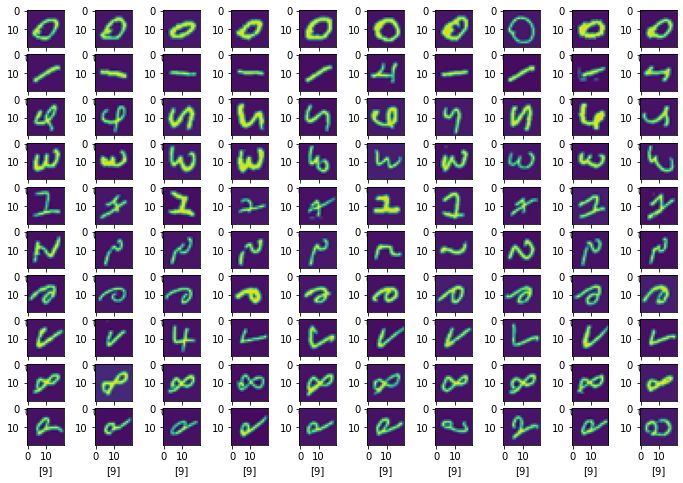

In [209]:
plt.figure(figsize=(12,8))
for i in range(10):
    for j in range(10):
        ax = plt.subplot(10,10,10*i+j+1)
        ax.imshow(X[500*i+j].reshape(20,20))
        ax.set_xlabel(str(y[500*i+j]))
plt.show()

In [210]:
a = np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1]])
print(a.ravel().shape[-1])

12


In [211]:
X_e = np.insert(X,0,1,axis=1)
print(X_e.shape)

(5000, 401)


In [212]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

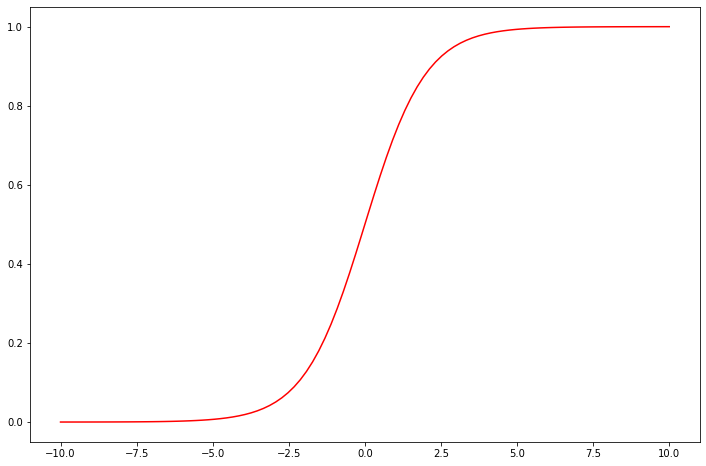

In [213]:
test_x = np.linspace(-10,10,100)
test_y = sigmoid(test_x)
_,ax = plt.subplots(figsize=(12,8))
ax.plot(test_x,test_y,c='r',label='Sigmoid')
plt.show()

In [214]:
def lrCostFunction(theta,X,y,r=1):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    pos = -y.T * np.log(sigmoid(X*theta.T))
    neg = (1-y).T * np.log(1-sigmoid(X*theta.T))
    penalty = r / 2 * theta * theta.T
    return np.sum(pos-neg+penalty)/len(X)

In [215]:
y_0 = np.zeros(y.shape)
y_0[y==0] = 1
theta_0 = np.zeros((1,X_e.shape[1]))
print(lrCostFunction(theta_0,X_e,y_0))

0.693147180559947


In [216]:
def gradient(theta,X,y,r=1):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    error = sigmoid(X*theta.T) - y
    grad = (error.T * X + r * theta) / len(y)
    grad[0,0] = np.sum(error.T*X[:,0]) / len(y)
    return grad

In [217]:
def gradientDescent(theta,X,y,alpha,iters):
    update_theta = theta.copy()
    loss_list = []
    for _ in range(iters):
        loss = lrCostFunction(update_theta,X,y)
        loss_list.append(loss)
        grad = gradient(update_theta,X,y)
        update_theta -= alpha * grad
    return update_theta, loss_list

In [218]:
theta_0_result, loss_0_list = gradientDescent(theta_0,X_e,y_0,0.01,500)

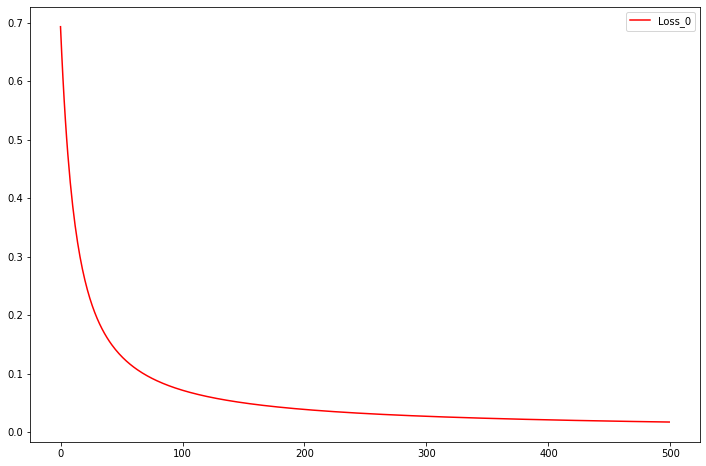

In [219]:
_, ax = plt.subplots(figsize=(12,8))
ax.plot(loss_0_list,c='r',label='Loss_0')
ax.legend(loc='best')
plt.show()

In [220]:
print(lrCostFunction(theta_0_result,X_e,y_0))

0.016989224696724196


In [221]:
from scipy import optimize
result = optimize.minimize(fun=lrCostFunction,x0=theta_0,method='TNC',jac=gradient,args=(X_e,y_0))

In [222]:
print(result.x)

[-1.11658237e+00  0.00000000e+00  0.00000000e+00 -4.93552485e-07
  5.24653909e-06  8.92682949e-06 -1.67617639e-04 -3.46877196e-04
 -3.99741364e-04 -2.04514495e-04 -1.47412714e-04 -3.10647080e-05
  2.10828309e-05  3.07774451e-05  4.38705910e-05  4.66066051e-05
  1.10419125e-05  4.13807513e-06  6.21220030e-07 -9.24985764e-08
  0.00000000e+00  2.66775247e-08 -3.16773095e-07  4.96120908e-06
 -4.37848204e-05 -3.24666630e-05 -4.96061292e-04 -1.63594893e-03
 -2.63534140e-03 -2.09065581e-03 -1.17017976e-03 -1.92266536e-04
 -5.25202943e-06 -2.46457274e-04 -4.91444022e-04 -5.80533163e-04
 -1.88414499e-04 -3.27460874e-05  2.59930715e-05  1.09470436e-05
  4.95560503e-06 -2.58596571e-07  2.09621652e-06  7.38549745e-07
  1.59805493e-04 -1.02975015e-05 -3.79981274e-03 -8.25333699e-03
 -1.05392681e-02 -8.67966783e-03 -4.83998197e-03 -3.52014954e-03
 -2.60330923e-03 -1.29580141e-03 -1.12839238e-03 -2.40601321e-04
  9.14394728e-04 -2.60824907e-04 -3.06127731e-04  2.13593533e-06
 -3.70205950e-05 -5.98209

In [223]:
def multiClassesLR(X,y,r):
    classes = np.max(y)
    all_theta = np.zeros((classes,X.shape[1]))
    for i in range(1,classes+1):
        theta_i = np.zeros((1,X.shape[1]))
        y_i = np.zeros(y.shape)
        y_i[y==i] = 1
        result_i = optimize.minimize(fun=lrCostFunction,x0=theta_i,method='TNC',jac=gradient,args=(X,y_i))
        all_theta[i-1,:] = result_i.x
    return all_theta

In [224]:
all_theta = multiClassesLR(X_e,y,1)

In [225]:
print(all_theta)

[[-2.29462508e+00  0.00000000e+00  0.00000000e+00 ...  1.21869844e-03
   1.88890651e-08  0.00000000e+00]
 [-3.18294018e+00  0.00000000e+00  0.00000000e+00 ...  4.45186964e-03
  -5.07566205e-04  0.00000000e+00]
 [-4.66436499e+00  0.00000000e+00  0.00000000e+00 ... -2.78115058e-05
  -2.63491094e-07  0.00000000e+00]
 ...
 [-7.93116502e+00  0.00000000e+00  0.00000000e+00 ... -9.71915464e-05
   7.43012255e-06  0.00000000e+00]
 [-4.57239179e+00  0.00000000e+00  0.00000000e+00 ... -1.32119916e-03
   1.02161866e-04  0.00000000e+00]
 [-4.88549784e+00  0.00000000e+00  0.00000000e+00 ... -8.73411278e-05
   1.16346503e-05  0.00000000e+00]]


In [226]:
predict_y = np.argmax(np.dot(X_e,all_theta.T),axis=1) + 1
label = predict_y[predict_y==y.ravel()]
print('accuracy: ', len(label)/len(y))

accuracy:  0.9444
